In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris, load_wine, load_breast_cancer


In [2]:
iris = load_iris()
x=iris.data
y=iris.target
feature_names = iris.feature_names
target_names = iris.target_names


In [3]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
x.shape
y.shape

(150,)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)


In [7]:
x_train.shape

(120, 4)

In [8]:
x_test.shape

(30, 4)

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1,max_features='sqrt',bootstrap=True,random_state=42,)

rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
rf_model.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542),
 DecisionTreeClassifier(max_features='sqrt', random_state=1273642419),
 DecisionTreeClassifier(max_features='sqrt', random_state=1935803228),
 DecisionTreeClassifier(max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_features='sqrt', random_state=1201263687),
 DecisionTreeClassifier(max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_features='sqrt', random_state=1914837113),
 DecisionTreeClassifier(max_features='sqrt', random_state=669991378),
 DecisionTreeClassifier(max_features='sqrt', random_state=429389014),
 DecisionTreeClassifier(max_features='sqrt', random_state=249467210),
 DecisionTreeClassifier(max_features='sqrt', random_state=1972458954),
 DecisionTreeC

In [11]:
y_pred = rf_model.predict(x_test)

y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [12]:
y_pred_proba = rf_model.predict_proba(x_test)
y_pred_proba

array([[0.  , 0.99, 0.01],
       [1.  , 0.  , 0.  ],
       [0.  , 0.03, 0.97],
       [0.  , 1.  , 0.  ],
       [0.  , 0.87, 0.13],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.08, 0.92],
       [0.  , 0.86, 0.14],
       [0.  , 1.  , 0.  ],
       [0.  , 0.05, 0.95],
       [1.  , 0.  , 0.  ],
       [0.94, 0.06, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.98, 0.02],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [0.  , 0.08, 0.92],
       [1.  , 0.  , 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  ],
       [0.  , 0.04, 0.96],
       [0.  , 0.06, 0.94],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [13]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [14]:
classification_report(y_test, y_pred, target_names = target_names)

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        10\n  versicolor       1.00      1.00      1.00         9\n   virginica       1.00      1.00      1.00        11\n\n    accuracy                           1.00        30\n   macro avg       1.00      1.00      1.00        30\nweighted avg       1.00      1.00      1.00        30\n'

In [15]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

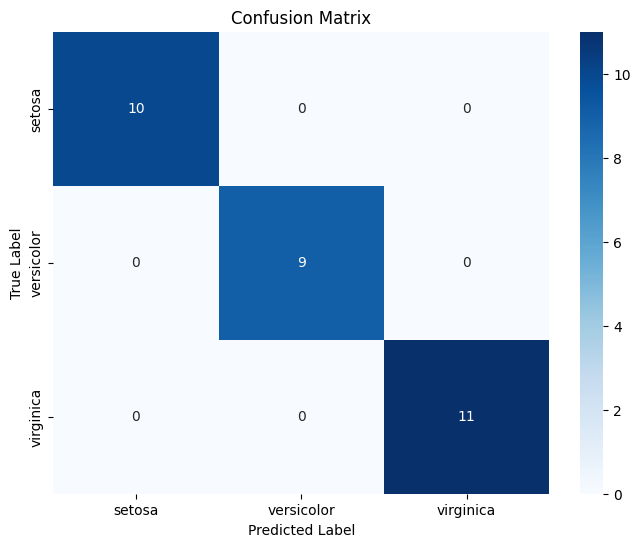

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()